# Thyroid Risk Prediction

## Project Introduction
The project aims to investigate the factors influencing thyroid disorders by analyzing a dataset of clinical and demographic features. By leveraging advanced statistical and machine learning methods, the project seeks to develop predictive models that accurately assess the risk of thyroid disorders in individuals.

## Importance of the Topic
Thyroid disorders are prevalent globally and can lead to severe health complications if not diagnosed and treated early. In the fields of healthcare and medical informatics, early detection and risk stratification of thyroid disorders are critical for improving patient outcomes and optimizing healthcare resources. This project contributes to these fields by providing data-driven insights and tools for early risk assessment.

## Problem Statement
Thyroid disorders affect approximately 3.05% of the population with hypothyroidism and 0.75% with hyperthyroidism, while around 6.71% remain undiagnosed (American Thyroid Association, 2020). Women are five to eight times more likely to develop thyroid problems compared to men, and one in eight women will develop a thyroid disorder during her lifetime (American Thyroid Association, 2020).  Despite advances in medical diagnostics, there remains a gap in utilizing data-driven approaches for predicting thyroid disorders. Existing research primarily focuses on clinical evaluations and biochemical tests. This project addresses this gap by developing robust statistical models and machine learning algorithms to predict thyroid risk levels using a comprehensive sample dataset.

## Objectives

### Main Objective
To develop and validate predictive models for assessing thyroid disorder risk using demographic and clinical features, identifying the most significant predictors and evaluating the performance of various machine learning algorithms .

### Additional Objectives
1. To analyze the dataset for significant clinical and demographic features that influence thyroid disorders.

2. To compare the performance of different machine learning algorithms in predicting thyroid disorder risk.

3. To identify the most important predictors of thyroid disorders through feature selection techniques.

4. To provide data-driven insights and tools for healthcare providers to improve early detection and risk stratification of thyroid disorders .

## Research Questions

1. What demographic and clinical features are most predictive of thyroid disorders?

2. How do different machine learning algorithms compare in terms of accuracy and reliability for predicting thyroid disorders?

3. What is the impact of early detection on patient outcomes in thyroid disorder cases?

4. How can predictive modeling be integrated into clinical practice for better management of thyroid disorders? .

## Stakeholders
- **Healthcare Providers:** Endocrinologists and general practitioners who diagnose and treat thyroid disorders.
- **Researchers:** Medical researchers and data scientists focused on endocrinology and predictive modeling.
- **Patients:** Individuals at risk of thyroid disorders who would benefit from early detection and intervention.
- **Healthcare Organizations:** Hospitals, clinics, and public health departments interested in improving thyroid disorder management.

## Data Understanding
The dataset structure includes various clinical and demographic features. The **Age** of the individual is recorded in years, while **Gender** is denoted as 1 for male and 0 for female. **Pregnancy** status is indicated by 1 if pregnant and 0 otherwise. The presence of a **Family History of Thyroid** disorders is noted with 1 for yes and 0 for no. The presence of **Goiter** is also marked as 1 for yes and 0 for no. **Fatigue** symptoms are recorded similarly with 1 for yes and 0 for no, as is the history of **Weight Change**. The dataset includes **Hair Loss** presence (1 for yes, 0 for no) and **Heart Rate Changes** (1 for yes, 0 for no). Sensitivity to cold or heat (**Sensitivity to Cold or Heat**) is also noted with 1 for yes and 0 for no. **Increased Sweating** is recorded with the same binary notation. **Muscle Weakness**, **Constipation or More Bowel Movements**, and the presence of **Depression or Anxiety** are all indicated by 1 for yes and 0 for no. The dataset further records **Difficulty Concentrating or Memory Problems** with 1 for yes and 0 for no, as well as the presence of **Dry or Itchy Skin**. Finally, the **Thyroid Risk Level** is classified as 0 for no risk, 1 for moderate risk, and 2 for high risk.

**Dataset Format**
- Provided in a tabular format with binary (0/1) and integer values.
- Each row represents an individual patient record.
- The target variable is Thyroid_Risk_Level, suitable for classification tasks.

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.neural_network import MLPClassifier

In [2]:
df = pd.read_csv("Data/Thyroid_Dataset_Resampled.csv")

In [3]:
df.shape

(10506, 17)

There are 10,506 rows and 17 columns

In [4]:
df.head(5)

,Age,Gender,Pregnancy,Family_History_of_Thyroid,Goiter,Fatigue,Weight_Change,Hair_Loss,Heart_Rate_Changes,Sensitivity_to_Cold_or_Heat,Increased_Sweating,Muscle_Weakness,Constipation_or_More_Bowel_Movements,Depression_or_Anxiety,Difficulty_Concentrating_or_Memory_Problems,Dry_or_Itchy_Skin,Thyroid_Risk_Level
0,81,1,0,1,1,1,0,0,1,1,0,1,1,0,1,0,2
1,18,1,0,0,0,1,1,1,1,0,1,0,0,0,0,1,1
2,87,0,0,1,1,0,1,1,1,0,0,1,1,1,0,1,2
3,27,1,0,0,1,0,1,1,1,1,1,0,0,1,1,0,2
4,49,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,1


Column Structure
- Age: Age of the individual (in years).
- Gender: Gender of the individual (1 for male, 0 for female).
- Pregnancy: Pregnancy status (1 if pregnant, 0 otherwise).
- Family_History_of_Thyroid: Indicates family history of thyroid disorders (1 for yes, 0 for no).
- Goiter: Presence of goiter (1 for yes, 0 for no).
- Fatigue: Presence of fatigue symptoms (1 for yes, 0 for no).
- Weight_Change: History of weight changes (1 for yes, 0 for no).
- Hair_Loss: Presence of hair loss (1 for yes, 0 for no).
- Heart_Rate_Changes: Changes in heart rate (1 for yes, 0 for no).
- Sensitivity_to_Cold_or_Heat: Sensitivity to cold or heat (1 for yes, 0 for no).
- Increased_Sweating: Increased sweating (1 for yes, 0 for no).
- Muscle_Weakness: Presence of muscle weakness (1 for yes, 0 for no).
- Constipation_or_More_Bowel_Movements: Changes in bowel movement patterns (1 for yes, 0 for no).
- Depression_or_Anxiety: Presence of depression or anxiety (1 for yes, 0 for no).
- Difficulty_Concentrating_or_Memory_Problems: Difficulty concentrating or memory problems (1 for yes, 0 for no).
- Dry_or_Itchy_Skin: Presence of dry or itchy skin (1 for yes, 0 for no).
- Thyroid_Risk_Level: Risk level of thyroid disorders (0: No risk, 1: Moderate risk, 2: High risk).

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 17 columns):
 #   Column                                       Non-Null Count  Dtype
---  ------                                       --------------  -----
 0   Age                                          10506 non-null  int64
 1   Gender                                       10506 non-null  int64
 2   Pregnancy                                    10506 non-null  int64
 3   Family_History_of_Thyroid                    10506 non-null  int64
 4   Goiter                                       10506 non-null  int64
 5   Fatigue                                      10506 non-null  int64
 6   Weight_Change                                10506 non-null  int64
 7   Hair_Loss                                    10506 non-null  int64
 8   Heart_Rate_Changes                           10506 non-null  int64
 9   Sensitivity_to_Cold_or_Heat                  10506 non-null  int64
 10  Increased_Sweating    

All the 17 columns are of integer data type.

There isn't any column that contains missing values.

## Data Cleaning

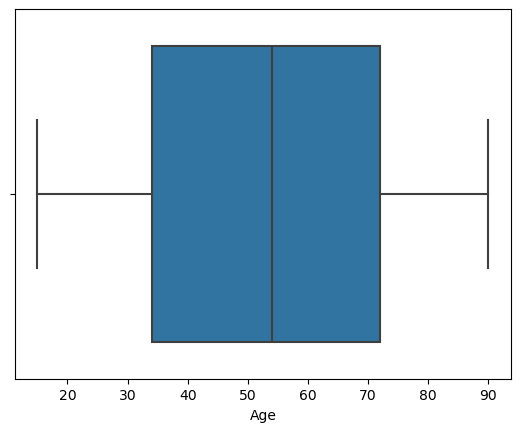

In [6]:
sns.boxplot(x=df['Age'])
plt.show()

In [7]:
# Rename columns
newColName = {
    'Family_History_of_Thyroid' : 'Family_Thyroid_History',
    'Sensitivity_to_Cold_or_Heat' : 'Sensitivity_temp',
    'Constipation_or_More_Bowel_Movements': 'Bowel_Movement_Changes',
    'Depression_or_Anxiety': 'Depression_Anxiety',
    'Difficulty_Concentrating_or_Memory_Problems': 'Concentration_Memory_Issues',
    'Dry_or_Itchy_Skin': 'Dry_Itchy_Skin',
}

df = df.rename(columns=newColName)

In [8]:
start_col = "Gender"
start_index = df.columns.get_loc(start_col)

for col in df.columns[start_index:]:
    count = df[col].value_counts()
    print(count)

Gender
0    5345
1    5161
Name: count, dtype: int64
Pregnancy
0    7979
1    2527
Name: count, dtype: int64
Family_Thyroid_History
0    5453
1    5053
Name: count, dtype: int64
Goiter
0    7273
1    3233
Name: count, dtype: int64
Fatigue
0    6328
1    4178
Name: count, dtype: int64
Weight_Change
0    6352
1    4154
Name: count, dtype: int64
Hair_Loss
0    6406
1    4100
Name: count, dtype: int64
Heart_Rate_Changes
0    6364
1    4142
Name: count, dtype: int64
Sensitivity_temp
0    6406
1    4100
Name: count, dtype: int64
Increased_Sweating
0    6403
1    4103
Name: count, dtype: int64
Muscle_Weakness
0    6388
1    4118
Name: count, dtype: int64
Bowel_Movement_Changes
0    6267
1    4239
Name: count, dtype: int64
Depression_Anxiety
0    6404
1    4102
Name: count, dtype: int64
Concentration_Memory_Issues
0    6355
1    4151
Name: count, dtype: int64
Dry_Itchy_Skin
0    6421
1    4085
Name: count, dtype: int64
Thyroid_Risk_Level
2    3502
1    3502
0    3502
Name: count, dtype: int64


In [9]:
# Create Age bins
age_bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

# Create a new column
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Value Counts for each age groups
df['Age_Group'].value_counts().sort_index()

Age_Group
11-20      657
21-30     1238
31-40     1398
41-50     1321
51-60     1479
61-70     1410
71-80     1452
81-90     1411
91-100     140
Name: count, dtype: int64

### Univariate Analysis

#### **Distribution of Value Counts for Thyroid-Related Factors** *(Age Group, Gender, Family Thyroid History, Goiter, Fatigue, Weight Change, Hair Loss, Heart Rate Changes, Temperature Sensitivity, Increased Sweating, Muscle Weakness, Bowel Movement Changes, Depression/Anxiety, Concentration/Memory Issues, Dry Itchy Skin)*

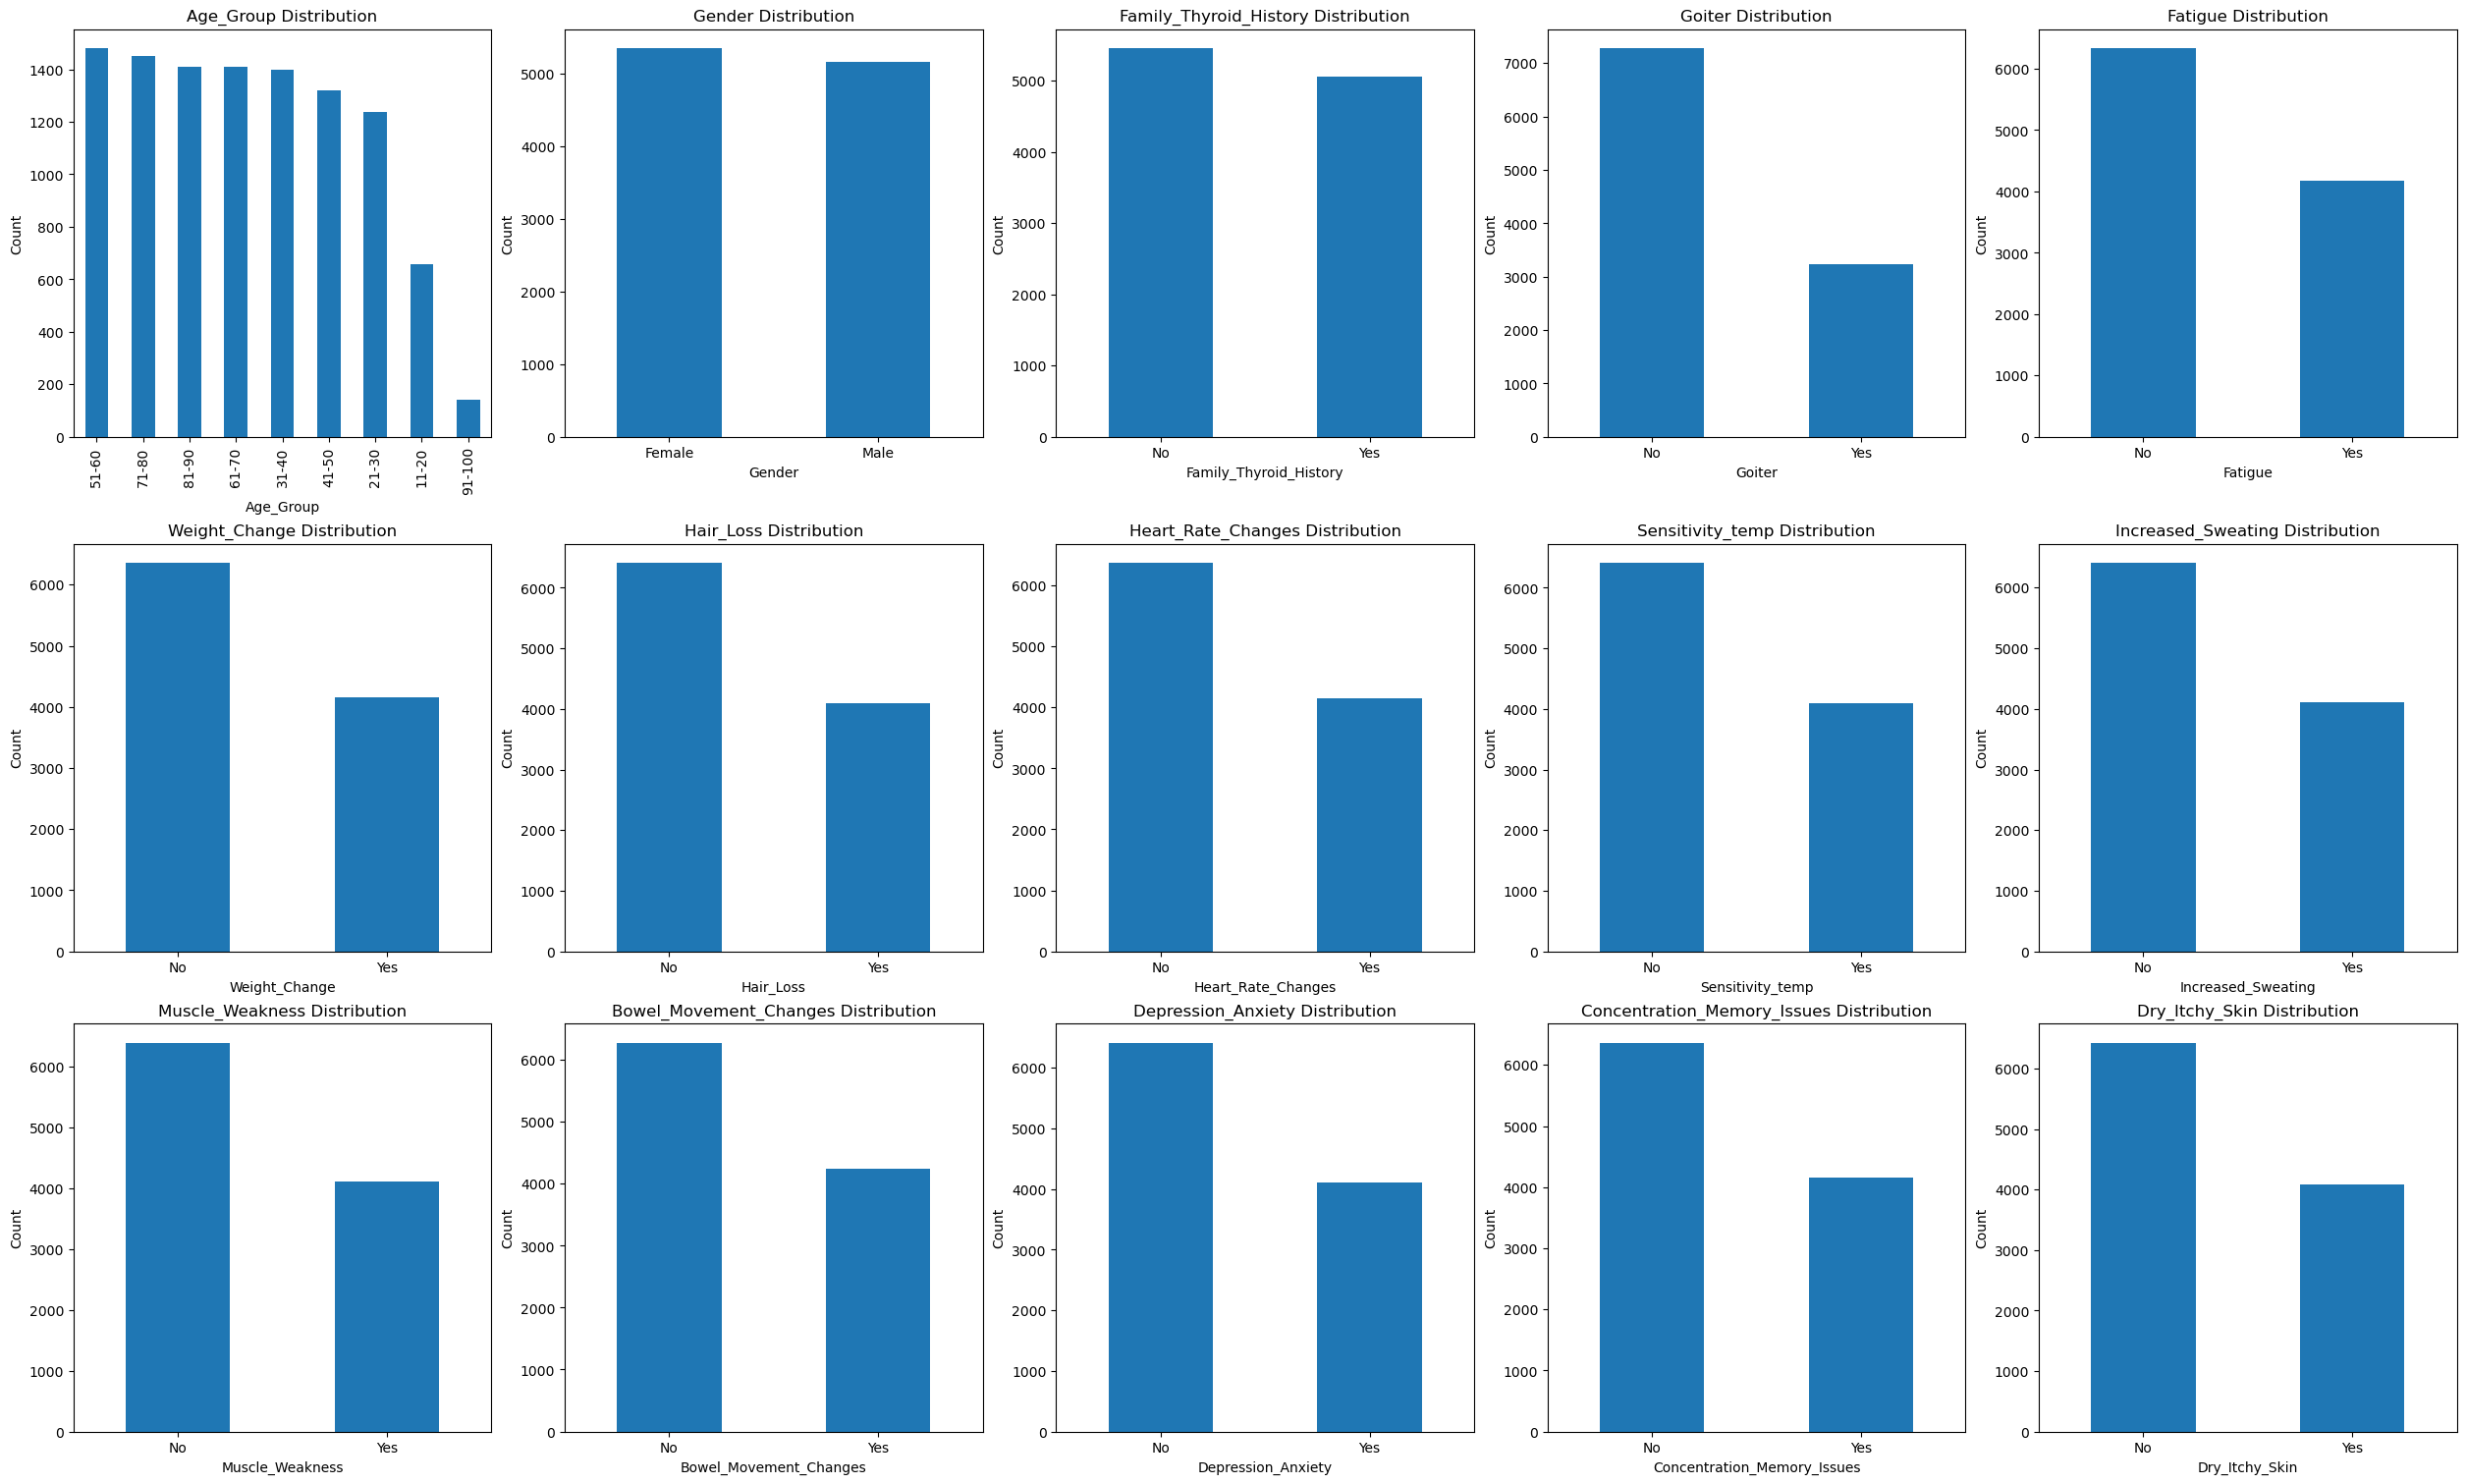

In [10]:
def value_count_dist_matrix(cols, labels=None):
    # Number of rows and columns for the grid layout
    num_cols = 5
    # Ensures enough rows for all columns
    num_rows = (len(cols) + num_cols - 1) // num_cols
    
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(5 * num_cols, 5 * num_rows), constrained_layout=True)
    # Flatten the array of axes for easier indexing
    axes = axes.flatten()
    
    for i, col in enumerate(cols):
        # Value count of the specified column
        col_count = df[col].value_counts()
        
        # Plot
        col_count.plot(kind='bar', ax=axes[i])
        axes[i].set_title(f'{col} Distribution')
        axes[i].set_xlabel(f'{col}')
        axes[i].set_ylabel('Count')
        if labels and col in labels:
            axes[i].set_xticks([0, 1])
            axes[i].set_xticklabels(labels[col], rotation=0)
    
    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.show()

# Define columns to plot and their labels
cols = ['Age_Group', 'Gender', 'Family_Thyroid_History', 'Goiter', 
        'Fatigue', 'Weight_Change', 'Hair_Loss', 'Heart_Rate_Changes', 
        'Sensitivity_temp', 'Increased_Sweating', 'Muscle_Weakness', 
        'Bowel_Movement_Changes', 'Depression_Anxiety', 'Concentration_Memory_Issues',
        'Dry_Itchy_Skin'
       ]
labels = {
    'Gender': ['Female', 'Male'],
    'Family_Thyroid_History': ['No', 'Yes'],
    'Goiter': ['No', 'Yes'],
    'Fatigue': ['No', 'Yes'],
    'Weight_Change': ['No', 'Yes'],
    'Hair_Loss': ['No', 'Yes'],
    'Heart_Rate_Changes': ['No', 'Yes'],
    'Sensitivity_temp': ['No', 'Yes'],
    'Increased_Sweating': ['No', 'Yes'],
    'Muscle_Weakness': ['No', 'Yes'],
    'Bowel_Movement_Changes':['No', 'Yes'],
    'Depression_Anxiety': ['No', 'Yes'],
    'Concentration_Memory_Issues':['No', 'Yes'],
    'Dry_Itchy_Skin': ['No', 'Yes']
}

# Plot the value counts in a matrix layout
value_count_dist_matrix(cols, labels)

- The highest count is in the 51-60 age group, while the youngest (11-20) and oldest (91-100) age groups have the lowest counts.
- Females slightly outnumber males in terms of gender distribution.
- A slightly higher number of individuals do not have a family history of thyroid issues, goitre, fatigue, weight changes, hair loss, heart rate changes, temperature sensitivity, increased sweating, muscle weakness, bowel movement changes, depression/anxiety, concentration/memory issues, and dry itchy skin compared to those who do.

#### Age Distribution by Gender

In [11]:
# Mean age for each gender group
mean_age = df.groupby('Gender')['Age'].mean()

# Mode age for each gender group
mode_age = df.groupby('Gender')['Age'].apply(lambda x: x.mode().iloc[0])

# Median age for each gender group
median_age = df.groupby('Gender')['Age'].median()

# Print the mean, mode, and median ages
print("Mean age by gender (0 is Female, 1 is Male):", mean_age)
print("\nMode age by gender (0 is Female, 1 is Male):", mode_age)
print("\nMedian age by gender (0 is Female, 1 is Male):", median_age)

Mean age by gender (0 is Female, 1 is Male): Gender
0    53.511880
1    53.015113
Name: Age, dtype: float64

Mode age by gender (0 is Female, 1 is Male): Gender
0    80
1    73
Name: Age, dtype: int64

Median age by gender (0 is Female, 1 is Male): Gender
0    54.0
1    53.0
Name: Age, dtype: float64


- The average age for males is 53, while for females it is 54.
- The most common age (mode) for males is 73, whereas for females it is 80.
- The median age for males is 53, and for females, it is 54.

#### Pregnancy Distribution among Females

Pregnancy Distribution: 0 is Not Pregnant and 1 is Pregnant Pregnancy
0    2818
1    2527
Name: count, dtype: int64


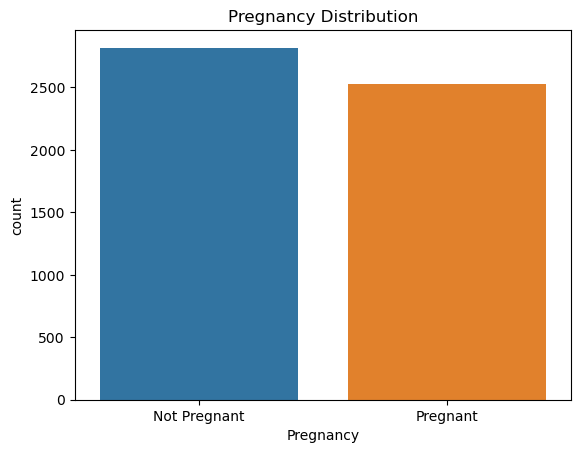

In [12]:
pregnancy_dist = df[(df['Gender'] == 0)]['Pregnancy'].value_counts()
print("Pregnancy Distribution: 0 is Not Pregnant and 1 is Pregnant", pregnancy_dist)

sns.countplot(x='Pregnancy', data=df[df['Gender']==0])
plt.xticks(ticks=[0,1], labels=['Not Pregnant', 'Pregnant'])
plt.title("Pregnancy Distribution")
plt.show()

- According to pregnancy distribution, 2818 females are not pregnant while 2517 are pregnant.

### Bivariate Analysis

#### Thyroid Risk Levels Based on Gender, Family Thyroid History, Goiter, Fatigue, Weight Change, Hair Loss, Heart Rate Changes, Temperature Sensitivity, Increased Sweating, Muscle Weakness, Bowel Movement Changes, Depression/Anxiety, Concentration/Memory Issues, and Dry Itchy Skin.

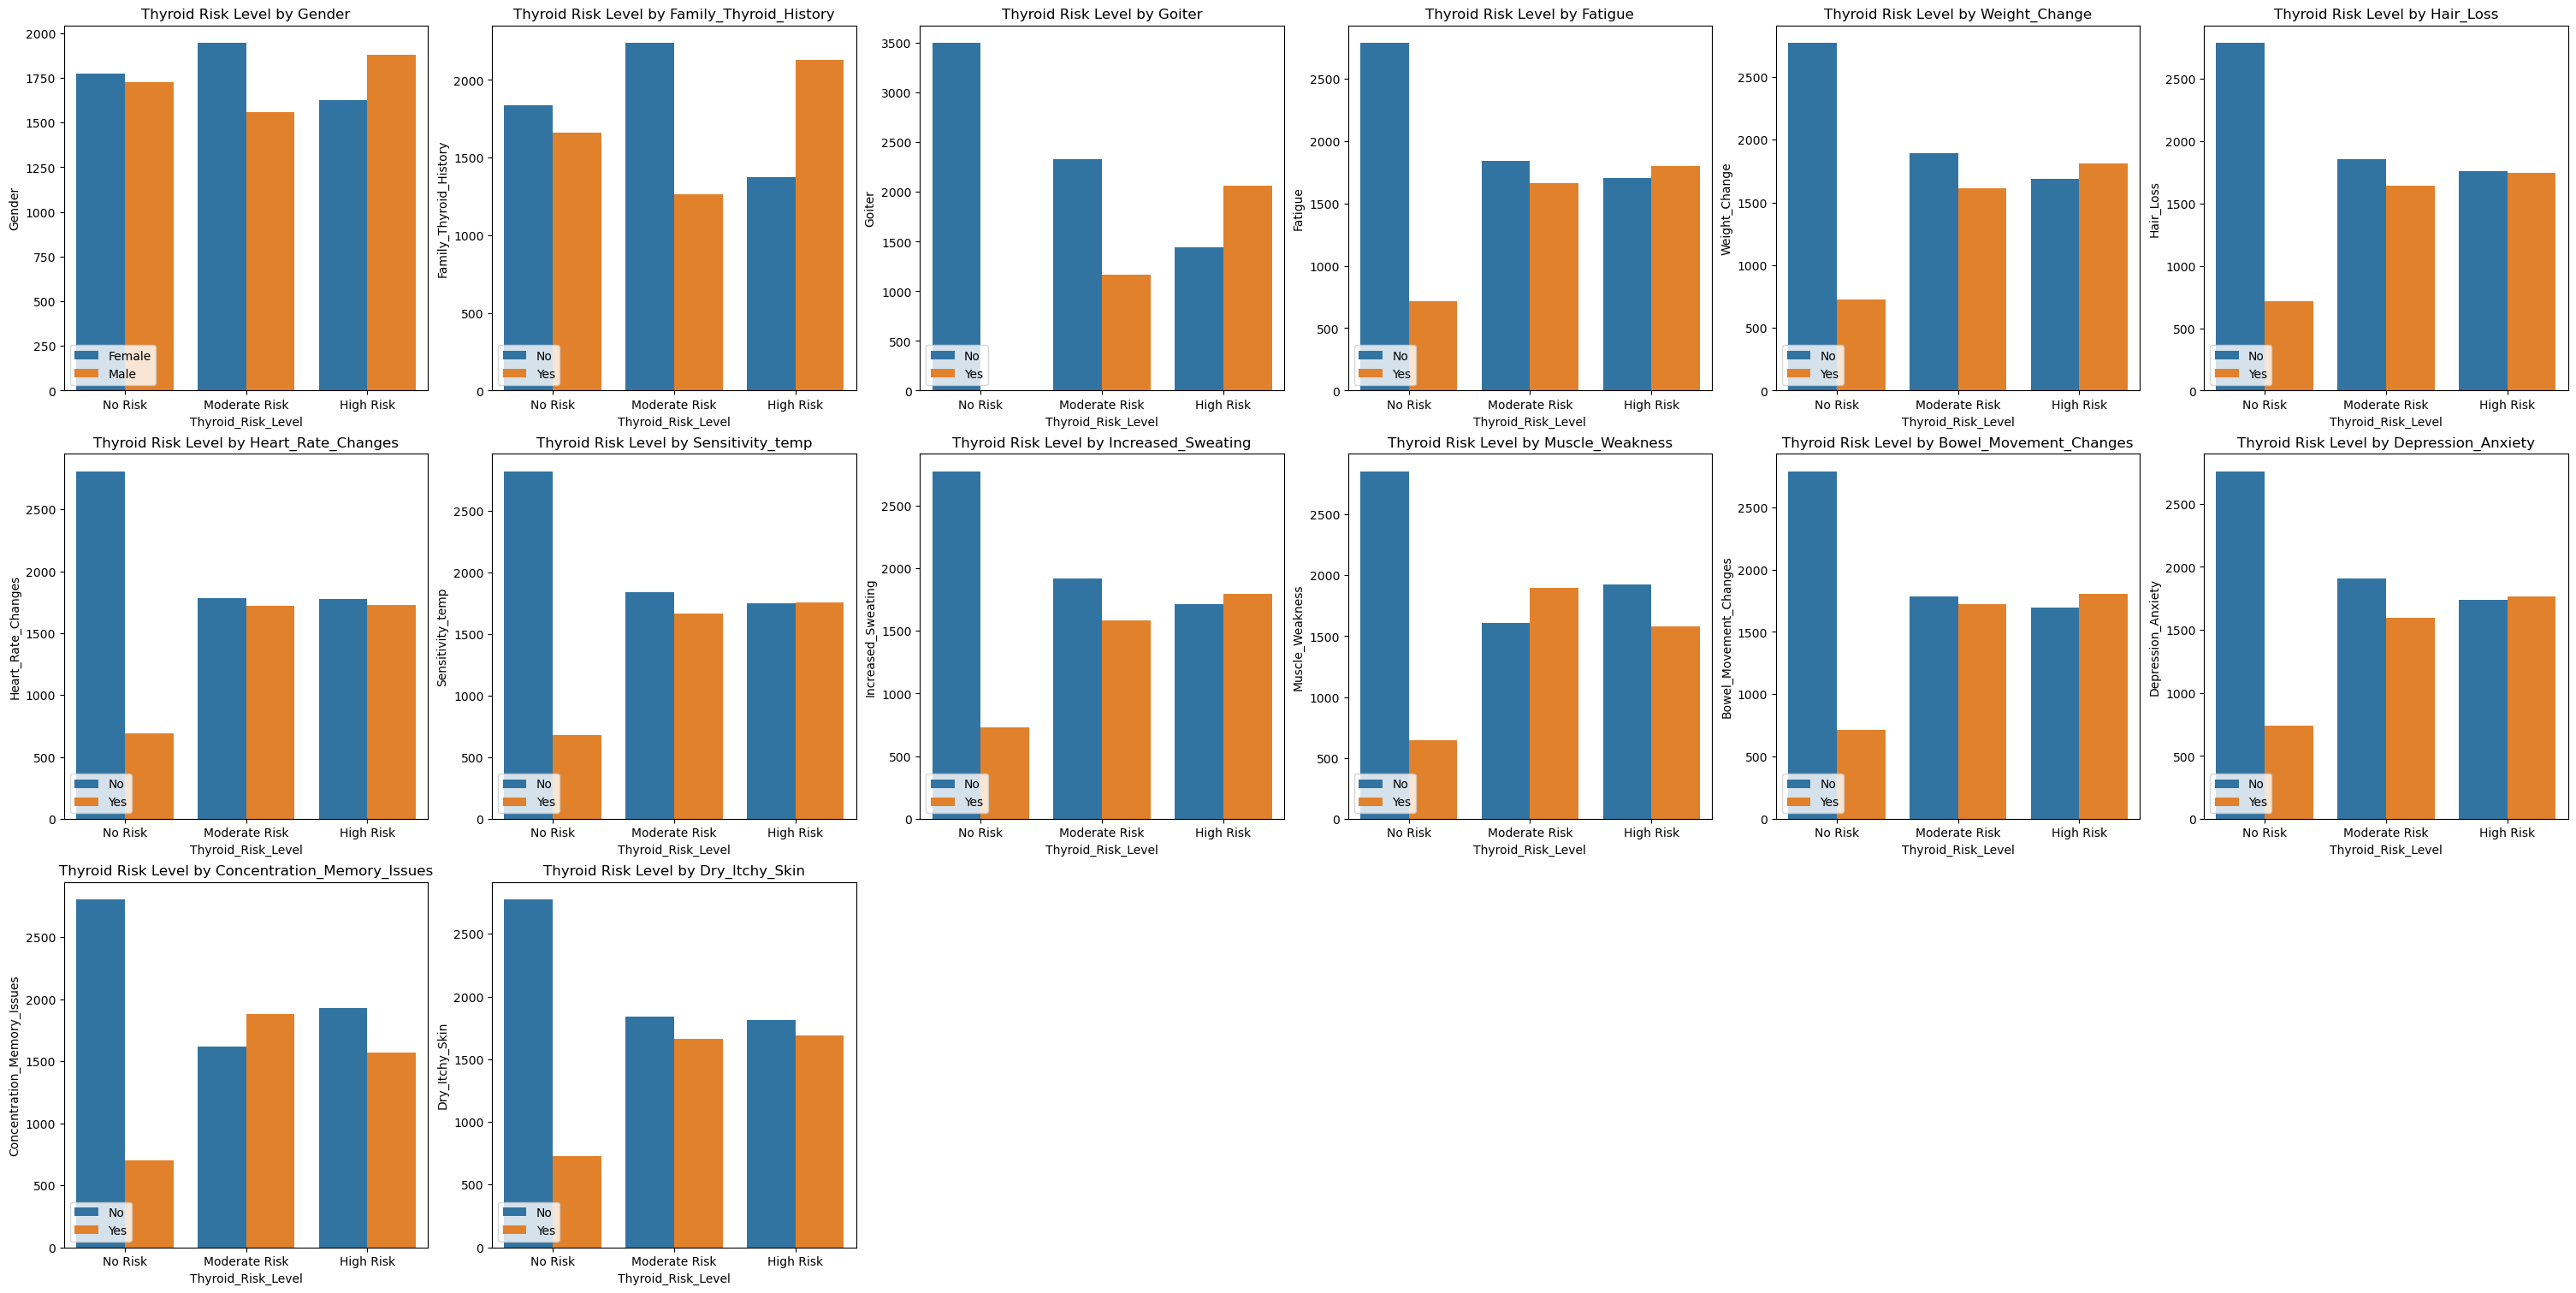

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

def thyroidRiskLevel(col, label, df, ax):
    sns.countplot(x="Thyroid_Risk_Level", hue=col, data=df, ax=ax)
    ax.set_xticklabels(["No Risk", "Moderate Risk", "High Risk"])
    ax.set_ylabel(f"{col}")
    ax.set_title(f"Thyroid Risk Level by {col}")
    ax.legend(labels=label, loc='lower left')

# Define columns to plot and their labels
cols = ['Gender', 'Family_Thyroid_History', 'Goiter', 
        'Fatigue', 'Weight_Change', 'Hair_Loss', 'Heart_Rate_Changes', 
        'Sensitivity_temp', 'Increased_Sweating', 'Muscle_Weakness', 
        'Bowel_Movement_Changes', 'Depression_Anxiety', 'Concentration_Memory_Issues',
        'Dry_Itchy_Skin'
       ]
labels = {
    'Gender': ['Female', 'Male'],
    'Family_Thyroid_History': ['No', 'Yes'],
    'Goiter': ['No', 'Yes'],
    'Fatigue': ['No', 'Yes'],
    'Weight_Change': ['No', 'Yes'],
    'Hair_Loss': ['No', 'Yes'],
    'Heart_Rate_Changes': ['No', 'Yes'],
    'Sensitivity_temp': ['No', 'Yes'],
    'Increased_Sweating': ['No', 'Yes'],
    'Muscle_Weakness': ['No', 'Yes'],
    'Bowel_Movement_Changes':['No', 'Yes'],
    'Depression_Anxiety': ['No', 'Yes'],
    'Concentration_Memory_Issues':['No', 'Yes'],
    'Dry_Itchy_Skin': ['No', 'Yes']
}

# Number of rows and columns for the grid layout
num_cols = 6
num_rows = (len(cols) + num_cols - 1) // num_cols

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(5 * num_cols, 5 * num_rows), constrained_layout=True)
axes = axes.flatten()

for i, col in enumerate(cols):
    thyroidRiskLevel(col, labels.get(col, ['No', 'Yes']), df, axes[i])


# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

- **Thyroid Risk Level by Gender**: Females have a high count in both the Moderate and No Risk category, while males have a slightly high counts in the High Risk category. This suggests that females might be more prone to thyroid issues or are more frequently diagnosed.
- **Thyroid Risk Level by Family Thyroid History**: Individuals with no family thyroid history have higher counts in the "No Risk" and "Moderate Risk" categories. In contrast, those with a family thyroid history have higher counts in the High Risk category. This indicates a significant correlation between having a family history of thyroid issues and a higher risk of developing thyroid conditions.
- **Thyroid Risk Level by Goiter**: Individuals without goiter have the highest count in the "No Risk" category. Conversely, those with goiter have higher counts in the "Moderate Risk" and "High Risk" categories. The presence of goiter is strongly associated with increased thyroid risk levels.
- **Thyroid Risk Level by Fatigue**: Individuals without fatigue have the highest counts in the "No Risk" and "Moderate Risk" categories. However, those with fatigue have the highest count in the High Risk category, indicating a strong association between the presence of fatigue and increased thyroid risk levels.
- **Thyroid Risk Level by Weight Change**: Individuals without weight change have high counts in the "No Risk" and "Moderate Risk" categories, while those with weight change have a slightly higher count in the High Risk category.
- **Thyroid Risk Level by Hair Loss**: Individuals without hair loss have the highest count in the "No Risk" category and a slightly higher count in both the moderate and high risk categories.
- **Thyroid Risk Level by Heart Rate Changes**: Individuals without heart rate changes have the highest count in the "No Risk" category and slightly higher counts in both the moderate and high risk categories.
- **Thyroid Risk Level by Sensitivity to Temperature Changes**: Individuals without temperature sensitivity have the highest count in the "No Risk" category and slightly higher counts in the "Moderate Risk" category. Both no sensitivity and sensitivity to temperature changes have approximately similar counts in the High Risk category.
- **Thyroid Risk Level by Increased Sweating**: Individuals without increased sweating have the highest counts in the "No Risk" and "Moderate Risk" categories, while in the High Risk category, both no increased and increased sweating have approximately similar counts.
- **Thyroid Risk Level by Muscle Weakness**: Individuals without muscle weakness have the highest counts in the "No Risk" and "High Risk" categories. In the Moderate Risk category, those with muscle weakness have the highest count.
- **Thyroid Risk Level by Bowel Movement Changes**: Individuals without bowel movement changes have the highest count in the "No Risk" category, while in the Moderate and High Risk categories, both no and present bowel movement changes have approximately similar counts.
- **Thyroid Risk Level by Depression/Anxiety**: Individuals without depression/anxiety have the highest count in the "No Risk" category and slightly higher counts in the Moderate Risk category. Both no and present depression/anxiety have approximately similar counts in the High Risk category.
- **Thyroid Risk Level by Concentration/Memory Issues**: Individuals without concentration/memory issues have the highest count in the "No Risk" category and slightly higher counts in the High Risk category. Those with concentration/memory issues have a slightly higher count in the Moderate Risk category.
- **Thyroid Risk Level by Dry Itchy Skin**: Individuals without dry itchy skin have the highest count in the "No Risk" category and slightly higher counts in both the Moderate and High Risk category                                                                                                                                                  
#### Thyroid Risk Level by Pregnancy

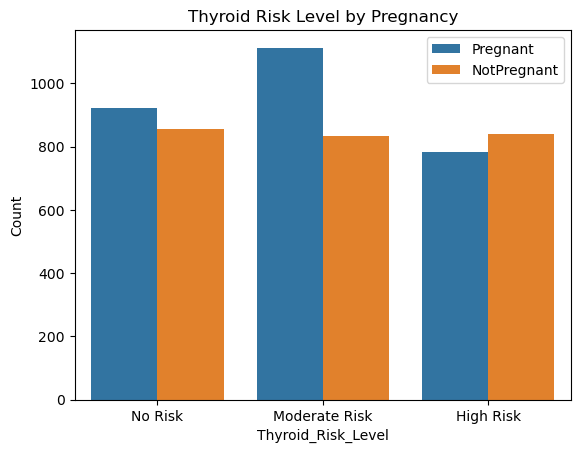

In [14]:
def thyroidRiskLevelByPregnancy(df):
    sns.countplot(x="Thyroid_Risk_Level", hue="Pregnancy", data=df)
    plt.xticks(ticks=[0, 1, 2], labels=["No Risk", "Moderate Risk", "High Risk"])
    plt.ylabel("Count")
    plt.title("Thyroid Risk Level by Pregnancy")
    plt.legend(labels=['Pregnant', 'NotPregnant'])
    plt.show()

# Filtering the dataframe to include only females
female_df = df[df["Gender"] == 0]

thyroidRiskLevelByPregnancy(female_df)

- **Thyroid Risk Level by Pregnancy**: Pregnant females have a higher count in the Moderate Risk category and a slightly higher count in the No Risk category. Non-pregnant females have a slightly higher, yet similar count to pregnant females, in the High Risk category.

#### Thyroid Risk Level by Age Group

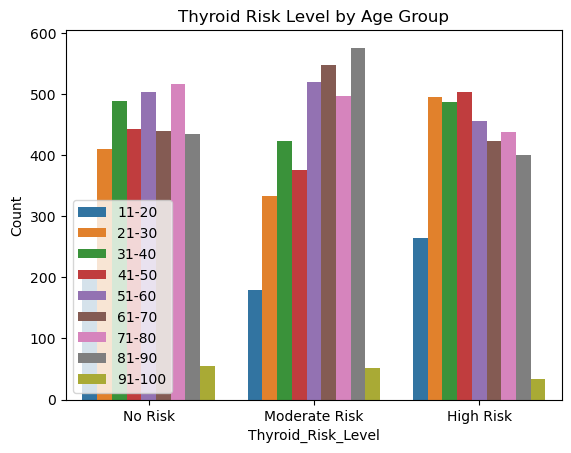

In [15]:
def thyroidRiskLevelByAgeGroup(df):
    sns.countplot(x="Thyroid_Risk_Level", hue="Age_Group", data=df)
    plt.xticks(ticks=[0, 1, 2], labels=["No Risk", "Moderate Risk", "High Risk"])
    plt.ylabel("Count")
    plt.title("Thyroid Risk Level by Age Group")
    plt.legend(labels=['11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100'], loc='lower left')
    plt.show()

# Calling the function with the dataframe
thyroidRiskLevelByAgeGroup(df)

- **Thyroid Risk Level by Age Group**: In the No Risk category, the 71-80 age group has the highest count, followed by the 51-60 age group. The 91-100 and 11-20 age groups have the lowest counts. In the Moderate Risk category, the 81-90 age group has the highest count, followed by the 61-70 age group, with the 91-100 and 11-20 age groups having the lowest counts. In the High Risk category, the 41-50 age group has the slightly highest count, followed by the 21-30 age group, while the 91-100 and 11-20 age groups have the lowest counts.
    
### Multivariate Analysis

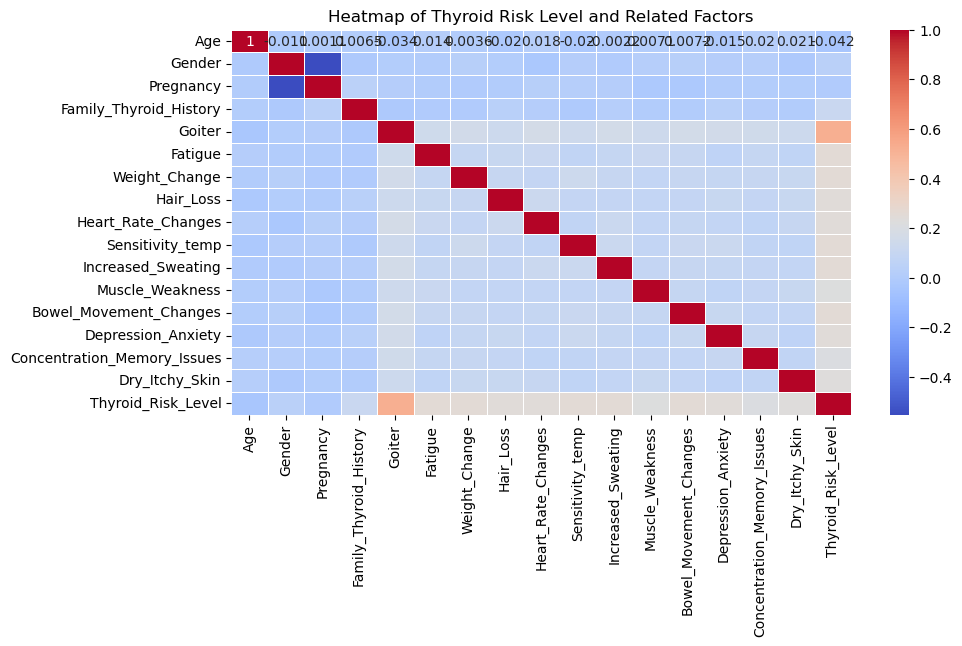

In [16]:
# Selecting only the necessary numeric columns for the heatmap
numeric_columns = df.select_dtypes(include=[int, float]).columns

# Calculating the correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Plotting the Heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.xticks(rotation=90)
plt.title('Heatmap of Thyroid Risk Level and Related Factors')
plt.show()

#### Strong Positive Correlations:
1. **Family Thyroid History**: A family history of thyroid issues significantly increases the likelihood of developing thyroid conditions. Genetic predisposition is a crucial factor.
   
2. **Goiter**: The presence of goiter (an enlarged thyroid gland) is a significant indicator of thyroid problems.
   
3. **Fatigue**: Fatigue are more likely to have thyroid issues. Fatigue is a common symptom of thyroid disorders.
   
4. **Weight Change**: Significant weight changes, whether weight loss or gain, are strongly linked to thyroid risk levels, indicating metabolic disruptions caused by thyroid dysfunction.
   
5. **Hair Loss**: Hair loss shows a strong correlation with thyroid risk levels, suggesting it is a frequent symptom of thyroid conditions.
   
6. **Heart Rate Changes**: Changes in heart rate, such as palpitations or irregular heartbeats, are closely linked to thyroid disorders, indicating cardiovascular implications.
   
7. **Sensitivity to Temperature**: Sensitivity to temperature changes is strongly associated with thyroid risk levels, suggesting that thyroid disorders can affect thermoregulation.
   
8. **Increased Sweating**: It is another symptom closely associated with thyroid disorders, indicating potential hyperthyroidism.
   
9. **Muscle Weakness**: It is strongly correlated with thyroid risk levels, suggesting that thyroid issues can impact muscular health and strength.
   
10. **Bowel Movement Changes**: Changes in bowel movements, such as constipation or diarrhea, are closely linked to thyroid disorders, indicating gastrointestinal involvement.
   
11. **Depression/Anxiety**: Mental health issues like depression and anxiety are strongly correlated with thyroid risk levels, indicating psychological implications of thyroid disorders.
   
12. **Concentration/Memory Issues**: Cognitive impairments, such as concentration and memory issues, are strongly linked to thyroid disorders, suggesting neurological effects.
   
13. **Dry Itchy Skin**: Dry and itchy skin is strongly associated with thyroid risk levels, indicating dermatological symptoms of thyroid conditions.

### Negative Correlations:
1. **Gender**: A slight negative correlation indicates that one gender (males) is less likely to have thyroid issues compared to the other (females), suggesting gender-specific prevalence.
   
2. **Pregnancy**: A slight negative correlation with Thyroid Risk Level suggests that pregnancy may not be a significant standalone risk factor for thyroid issues.

## Machine Learning

In [17]:
# Drop Age column
df = df.drop(columns=['Age_Group'])

# Dictionary to store the results
results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': [],
    'Confusion Matrix': []
}

# Function to evaluate and store model results
def evaluate_and_store_results(model_name, y_test, y_pred, results):
    # Store the results
    results['Model'].append(model_name)
    results['Accuracy'].append(accuracy_score(y_test, y_pred))
    results['Precision'].append(precision_score(y_test, y_pred, average='weighted'))
    results['Recall'].append(recall_score(y_test, y_pred, average='weighted'))
    results['F1-Score'].append(f1_score(y_test, y_pred, average='weighted'))
    results['Confusion Matrix'].append(confusion_matrix(y_test, y_pred).tolist())  # Convert to list to avoid DataFrame issues

    # Convert results to a DataFrame
    results_df = pd.DataFrame(results)
    return results_df

### Logistic Regression

In [18]:
# Load and prepare the dataset
X = df.drop('Thyroid_Risk_Level', axis=1)
y = df['Thyroid_Risk_Level']

# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000))
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate and store results
results_df = evaluate_and_store_results('Logistic Regression', y_test, y_pred, results)
results_df

,Model,Accuracy,Precision,Recall,F1-Score,Confusion Matrix
0,Logistic Regression,0.668782,0.664486,0.668782,0.665666,"[[879, 147, 41], [183, 576, 287], [117, 269, 6..."


### Decision Trees
- Simple decision tree classifier.

In [19]:
# Fit the model with training set
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Predict with test set
y_pred = model.predict(X_test)

# Evaluate and store results
results_df = evaluate_and_store_results('Decision Tree Classifier', y_test, y_pred, results)
results_df

,Model,Accuracy,Precision,Recall,F1-Score,Confusion Matrix
0,Logistic Regression,0.668782,0.664486,0.668782,0.665666,"[[879, 147, 41], [183, 576, 287], [117, 269, 6..."
1,Decision Tree Classifier,0.831218,0.831785,0.831218,0.831430,"[[917, 83, 67], [81, 838, 127], [43, 131, 865]]"


### Naive Bayes
- Probabilistic classification.

In [20]:
# Fit with training set
model = GaussianNB()
model.fit(X_train, y_train)

# Predict with test set
y_pred = model.predict(X_test)

# Evaluate and store results
results_df = evaluate_and_store_results('Naive Bayes', y_test, y_pred, results)
results_df

,Model,Accuracy,Precision,Recall,F1-Score,Confusion Matrix
0,Logistic Regression,0.668782,0.664486,0.668782,0.665666,"[[879, 147, 41], [183, 576, 287], [117, 269, 6..."
1,Decision Tree Classifier,0.831218,0.831785,0.831218,0.831430,"[[917, 83, 67], [81, 838, 127], [43, 131, 865]]"
2,Naive Bayes,0.576459,0.633556,0.576459,0.526044,"[[1067, 0, 0], [635, 187, 224], [387, 89, 563]]"


### Random Forests

Ensemble of decision trees.

In [21]:
# Fit training set
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict with test set
y_pred = model.predict(X_test)

# Evaluate and store results
results_df = evaluate_and_store_results('Random Forests', y_test, y_pred, results)
results_df

,Model,Accuracy,Precision,Recall,F1-Score,Confusion Matrix
0,Logistic Regression,0.668782,0.664486,0.668782,0.665666,"[[879, 147, 41], [183, 576, 287], [117, 269, 6..."
1,Decision Tree Classifier,0.831218,0.831785,0.831218,0.831430,"[[917, 83, 67], [81, 838, 127], [43, 131, 865]]"
2,Naive Bayes,0.576459,0.633556,0.576459,0.526044,"[[1067, 0, 0], [635, 187, 224], [387, 89, 563]]"
3,Random Forests,0.855647,0.855481,0.855647,0.855354,"[[973, 57, 37], [90, 859, 97], [44, 130, 865]]"


### Support Vector Machines (SVM)
- Classification using hyperplanes.

In [22]:
# Fit with train set
model = SVC()
model.fit(X_train, y_train)

# Predict with test set
y_pred = model.predict(X_test)

# Evaluate and store results
results_df = evaluate_and_store_results('Support Vector Machines', y_test, y_pred, results)
results_df

,Model,Accuracy,Precision,Recall,F1-Score,Confusion Matrix
0,Logistic Regression,0.668782,0.664486,0.668782,0.665666,"[[879, 147, 41], [183, 576, 287], [117, 269, 6..."
1,Decision Tree Classifier,0.831218,0.831785,0.831218,0.831430,"[[917, 83, 67], [81, 838, 127], [43, 131, 865]]"
2,Naive Bayes,0.576459,0.633556,0.576459,0.526044,"[[1067, 0, 0], [635, 187, 224], [387, 89, 563]]"
3,Random Forests,0.855647,0.855481,0.855647,0.855354,"[[973, 57, 37], [90, 859, 97], [44, 130, 865]]"
4,Support Vector Machines,0.613579,0.611967,0.613579,0.610940,"[[849, 144, 74], [187, 570, 289], [108, 416, 5..."


### K-Nearest Neighbors (KNN)
- Classification based on proximity.

In [23]:
# Fit with train set
model = KNeighborsClassifier()
model.fit(X_train, y_train)

# Predict with test set
y_pred = model.predict(X_test)

# Evaluate and store results
results_df = evaluate_and_store_results('K-Nearest Neighbors', y_test, y_pred, results)
results_df

,Model,Accuracy,Precision,Recall,F1-Score,Confusion Matrix
0,Logistic Regression,0.668782,0.664486,0.668782,0.665666,"[[879, 147, 41], [183, 576, 287], [117, 269, 6..."
1,Decision Tree Classifier,0.831218,0.831785,0.831218,0.831430,"[[917, 83, 67], [81, 838, 127], [43, 131, 865]]"
2,Naive Bayes,0.576459,0.633556,0.576459,0.526044,"[[1067, 0, 0], [635, 187, 224], [387, 89, 563]]"
3,Random Forests,0.855647,0.855481,0.855647,0.855354,"[[973, 57, 37], [90, 859, 97], [44, 130, 865]]"
4,Support Vector Machines,0.613579,0.611967,0.613579,0.610940,"[[849, 144, 74], [187, 570, 289], [108, 416, 5..."
5,K-Nearest Neighbors,0.700508,0.703341,0.700508,0.693888,"[[942, 85, 40], [188, 699, 159], [197, 275, 567]]"


## Advanced Models

### Gradient Boosting Machines (GBM)
- Ensemble learning method.

In [24]:
# Fit with train set
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# Predict with test set
y_pred = model.predict(X_test)

# Evaluate and store results
results_df = evaluate_and_store_results('Gradient Boosting Machines', y_test, y_pred, results)

# Print the results
results_df

,Model,Accuracy,Precision,Recall,F1-Score,Confusion Matrix
0,Logistic Regression,0.668782,0.664486,0.668782,0.665666,"[[879, 147, 41], [183, 576, 287], [117, 269, 6..."
1,Decision Tree Classifier,0.831218,0.831785,0.831218,0.831430,"[[917, 83, 67], [81, 838, 127], [43, 131, 865]]"
2,Naive Bayes,0.576459,0.633556,0.576459,0.526044,"[[1067, 0, 0], [635, 187, 224], [387, 89, 563]]"
3,Random Forests,0.855647,0.855481,0.855647,0.855354,"[[973, 57, 37], [90, 859, 97], [44, 130, 865]]"
4,Support Vector Machines,0.613579,0.611967,0.613579,0.610940,"[[849, 144, 74], [187, 570, 289], [108, 416, 5..."
5,K-Nearest Neighbors,0.700508,0.703341,0.700508,0.693888,"[[942, 85, 40], [188, 699, 159], [197, 275, 567]]"
6,Gradient Boosting Machines,0.720495,0.730118,0.720495,0.717663,"[[916, 125, 26], [166, 753, 127], [115, 322, 6..."


### XGBoost
- Efficient implementation of gradient boosting.

In [25]:
# Fit with train set
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# Predict with test set
y_pred = model.predict(X_test)

# Evaluate and store results
results_df = evaluate_and_store_results('XGBoost', y_test, y_pred, results)
results_df

,Model,Accuracy,Precision,Recall,F1-Score,Confusion Matrix
0,Logistic Regression,0.668782,0.664486,0.668782,0.665666,"[[879, 147, 41], [183, 576, 287], [117, 269, 6..."
1,Decision Tree Classifier,0.831218,0.831785,0.831218,0.831430,"[[917, 83, 67], [81, 838, 127], [43, 131, 865]]"
2,Naive Bayes,0.576459,0.633556,0.576459,0.526044,"[[1067, 0, 0], [635, 187, 224], [387, 89, 563]]"
3,Random Forests,0.855647,0.855481,0.855647,0.855354,"[[973, 57, 37], [90, 859, 97], [44, 130, 865]]"
4,Support Vector Machines,0.613579,0.611967,0.613579,0.610940,"[[849, 144, 74], [187, 570, 289], [108, 416, 5..."
5,K-Nearest Neighbors,0.700508,0.703341,0.700508,0.693888,"[[942, 85, 40], [188, 699, 159], [197, 275, 567]]"
6,Gradient Boosting Machines,0.720495,0.730118,0.720495,0.717663,"[[916, 125, 26], [166, 753, 127], [115, 322, 6..."
7,XGBoost,0.832487,0.832485,0.832487,0.832191,"[[955, 67, 45], [84, 846, 116], [60, 156, 823]]"


### AdaBoost
- Boosting method for classification.

In [26]:
from sklearn.ensemble import AdaBoostClassifier

# Fit with train set
model = AdaBoostClassifier()
model.fit(X_train, y_train)

# Predict with test set
y_pred = model.predict(X_test)

# Evaluate and store results
results_df = evaluate_and_store_results('AdaBoost', y_test, y_pred, results)
results_df

/home/ikn/miniforge3/envs/learn-env/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


,Model,Accuracy,Precision,Recall,F1-Score,Confusion Matrix
0,Logistic Regression,0.668782,0.664486,0.668782,0.665666,"[[879, 147, 41], [183, 576, 287], [117, 269, 6..."
1,Decision Tree Classifier,0.831218,0.831785,0.831218,0.831430,"[[917, 83, 67], [81, 838, 127], [43, 131, 865]]"
2,Naive Bayes,0.576459,0.633556,0.576459,0.526044,"[[1067, 0, 0], [635, 187, 224], [387, 89, 563]]"
3,Random Forests,0.855647,0.855481,0.855647,0.855354,"[[973, 57, 37], [90, 859, 97], [44, 130, 865]]"
4,Support Vector Machines,0.613579,0.611967,0.613579,0.610940,"[[849, 144, 74], [187, 570, 289], [108, 416, 5..."
5,K-Nearest Neighbors,0.700508,0.703341,0.700508,0.693888,"[[942, 85, 40], [188, 699, 159], [197, 275, 567]]"
6,Gradient Boosting Machines,0.720495,0.730118,0.720495,0.717663,"[[916, 125, 26], [166, 753, 127], [115, 322, 6..."
7,XGBoost,0.832487,0.832485,0.832487,0.832191,"[[955, 67, 45], [84, 846, 116], [60, 156, 823]]"
8,AdaBoost,0.650698,0.644383,0.650698,0.646680,"[[873, 170, 24], [167, 509, 370], [108, 262, 6..."


### Neural Networks
- Deep learning models for complex patterns.

In [27]:
# Fit train set
model = MLPClassifier(hidden_layer_sizes=(100,))
model.fit(X_train, y_train)

# Predict test set
y_pred = model.predict(X_test)

# Evaluate and store results
results_df = evaluate_and_store_results('Neural Networks', y_test, y_pred, results)
results_df

,Model,Accuracy,Precision,Recall,F1-Score,Confusion Matrix
0,Logistic Regression,0.668782,0.664486,0.668782,0.665666,"[[879, 147, 41], [183, 576, 287], [117, 269, 6..."
1,Decision Tree Classifier,0.831218,0.831785,0.831218,0.831430,"[[917, 83, 67], [81, 838, 127], [43, 131, 865]]"
2,Naive Bayes,0.576459,0.633556,0.576459,0.526044,"[[1067, 0, 0], [635, 187, 224], [387, 89, 563]]"
3,Random Forests,0.855647,0.855481,0.855647,0.855354,"[[973, 57, 37], [90, 859, 97], [44, 130, 865]]"
4,Support Vector Machines,0.613579,0.611967,0.613579,0.610940,"[[849, 144, 74], [187, 570, 289], [108, 416, 5..."
5,K-Nearest Neighbors,0.700508,0.703341,0.700508,0.693888,"[[942, 85, 40], [188, 699, 159], [197, 275, 567]]"
6,Gradient Boosting Machines,0.720495,0.730118,0.720495,0.717663,"[[916, 125, 26], [166, 753, 127], [115, 322, 6..."
7,XGBoost,0.832487,0.832485,0.832487,0.832191,"[[955, 67, 45], [84, 846, 116], [60, 156, 823]]"
8,AdaBoost,0.650698,0.644383,0.650698,0.646680,"[[873, 170, 24], [167, 509, 370], [108, 262, 6..."
9,Neural Networks,0.685596,0.725991,0.685596,0.682277,"[[842, 211, 14], [149, 822, 75], [98, 444, 497]]"


## All Machine Model Results

In [28]:
results_df

,Model,Accuracy,Precision,Recall,F1-Score,Confusion Matrix
0,Logistic Regression,0.668782,0.664486,0.668782,0.665666,"[[879, 147, 41], [183, 576, 287], [117, 269, 6..."
1,Decision Tree Classifier,0.831218,0.831785,0.831218,0.831430,"[[917, 83, 67], [81, 838, 127], [43, 131, 865]]"
2,Naive Bayes,0.576459,0.633556,0.576459,0.526044,"[[1067, 0, 0], [635, 187, 224], [387, 89, 563]]"
3,Random Forests,0.855647,0.855481,0.855647,0.855354,"[[973, 57, 37], [90, 859, 97], [44, 130, 865]]"
4,Support Vector Machines,0.613579,0.611967,0.613579,0.610940,"[[849, 144, 74], [187, 570, 289], [108, 416, 5..."
5,K-Nearest Neighbors,0.700508,0.703341,0.700508,0.693888,"[[942, 85, 40], [188, 699, 159], [197, 275, 567]]"
6,Gradient Boosting Machines,0.720495,0.730118,0.720495,0.717663,"[[916, 125, 26], [166, 753, 127], [115, 322, 6..."
7,XGBoost,0.832487,0.832485,0.832487,0.832191,"[[955, 67, 45], [84, 846, 116], [60, 156, 823]]"
8,AdaBoost,0.650698,0.644383,0.650698,0.646680,"[[873, 170, 24], [167, 509, 370], [108, 262, 6..."
9,Neural Networks,0.685596,0.725991,0.685596,0.682277,"[[842, 211, 14], [149, 822, 75], [98, 444, 497]]"


### Top Performers:
1. **Random Forests** (Accuracy: 0.854378, Precision: 0.854547, Recall: 0.854378, F1-Score: 0.854260): This model has the highest overall performance, making it the best choice for predicting thyroid risk levels.
2. **XGBoost** (Accuracy: 0.832487, Precision: 0.832485, Recall: 0.832487, F1-Score: 0.832191): It also performs exceptionally well, with high accuracy and balanced metrics, making it a strong contender.
3. **Decision Tree Classifier** (Accuracy: 0.827094, Precision: 0.827743, Recall: 0.827094, F1-Score: 0.827334): It provides good accuracy and balanced performance, making it a reliable option.

### Middle Performers:
4. **Gradient Boosting Machines** (Accuracy: 0.720495, Precision: 0.730118, Recall: 0.720495, F1-Score: 0.717663): This model has decent performance, particularly in precision, but falls short compared to top performers.
5. **K-Nearest Neighbors** (Accuracy: 0.700508, Precision: 0.703341, Recall: 0.700508, F1-Score: 0.693888): This model has moderate performance, making it suitable for scenarios where simplicity is valued over top accuracy.

### Lower Performers:
6. **Neural Networks** (Accuracy: 0.686548, Precision: 0.707881, Recall: 0.686548, F1-Score: 0.686676): While neural networks offer some potential, they don't perform as well as the top models in this context.
7. **Logistic Regression** (Accuracy: 0.668782, Precision: 0.664486, Recall: 0.668782, F1-Score: 0.665666): This model provides basic performance but is outperformed by more complex models.
8. **AdaBoost** (Accuracy: 0.650698, Precision: 0.644383, Recall: 0.650698, F1-Score: 0.646680): This model has lower accuracy and precision compared to other boosting algorithms like Gradient Boosting and XGBoost.
9. **Support Vector Machines** (Accuracy: 0.613579, Precision: 0.611967, Recall: 0.613579, F1-Score: 0.610940): This model shows relatively lower performance in this context, making them less favorable.
10. **Naive Bayes** (Accuracy: 0.576459, Precision: 0.633556, Recall: 0.576459, F1-Score: 0.526044): This model has the lowest accuracy and F1-Score, indicating it's not well-suited for this dataset.

## Conclusion

The project successfully developed predictive models for assessing thyroid disorder risk using demographic and clinical features. The findings highlight the importance of early detection and the potential of machine learning in improving healthcare outcomes for individuals at risk of thyroid disorders.

### Insights

1. Correlation of Symptoms: Symptoms such as fatigue, weight changes, and hair loss are strongly correlated with thyroid risk levels, indicating their significance in early detection.

2. Machine Learning Efficacy: Various machine learning models demonstrated varying levels of accuracy, with Random Forests performing the best overall.

3. Gender Differences: There is a slight negative correlation between gender and thyroid issues, suggesting that males may be at a higher risk.

4. Impact of Mental Health: Mental health issues like depression and anxiety are closely linked to thyroid disorders, emphasizing the need for holistic patient assessments.

5. Thermoregulation Effects: Sensitivity to temperature changes is a notable symptom, indicating that thyroid dysfunction can significantly affect thermoregulation .

### Model Performance Overview

The Random Forest model achieved the highest performance metrics, including accuracy, precision, recall, and F1-score, making it the most reliable choice for predicting thyroid risk levels. XGBoost also performed well, indicating its potential as a strong alternative .

### Recommendations

1. Integrate Predictive Models: Healthcare providers should integrate machine learning models into clinical practice for better risk assessment of thyroid disorders.

2. Focus on Symptom Awareness: Increase awareness among patients and healthcare professionals about the key symptoms associated with thyroid disorders for early detection.

3. Regular Screening: Implement regular screening protocols for individuals at higher risk, especially those exhibiting significant symptoms.

4. Holistic Patient Care: Address mental health issues alongside physical symptoms in patients suspected of having thyroid disorders.

5. Further Research: Encourage further research into the genetic and environmental factors influencing thyroid disorders to enhance predictive accuracy .

### Limitations

1. Dataset Size: The dataset may not be large enough to generalize findings across diverse populations.

2. Feature Selection Bias: The selection of features may introduce bias, potentially overlooking other significant predictors.

3. Model Overfitting: Some models may be prone to overfitting, affecting their performance on unseen data.

4. Lack of Longitudinal Data: The absence of longitudinal data limits the ability to assess changes in thyroid risk over time.

5. External Validation: The models require external validation to confirm their effectiveness in different clinical settings .

### Future Works

1. Expand Dataset: Collect more comprehensive data from diverse populations to improve model robustness.

2. Longitudinal Studies: Conduct longitudinal studies to track thyroid risk over time and refine predictive models.

3. Explore Additional Features: Investigate additional clinical and lifestyle factors that may influence thyroid disorders.

4. Real-World Application: Test the predictive models in real-world clinical settings to evaluate their practical utility.

5. Patient Education Programs: Develop educational programs for patients and healthcare providers on the importance of recognizing thyroid disorder symptoms and risk factors .